In [2]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_validate, cross_val_predict, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold

#

In [3]:
# plot histogramas
import matplotlib.pyplot as plt
import seaborn as sns

# plot histogramas
def plot_histograms(dataframe):
    columns = dataframe.columns
    num_cols = len(columns)
    num_rows = (num_cols // 2) + (num_cols % 4 > 0)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3) 
    axes = axes.flatten()
   
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(dataframe[column], ax=ax)
        ax.set_title(f'Histogram of {column}')

        # Calculate the value counts for each category in the column
        value_counts = dataframe[column].value_counts()
        total_count = len(dataframe[column])
        
        # Sort and select the top 5 values
        top_5 = value_counts.head(5)

        # Annotate the top 5 bars with their percentage
        for val, count in top_5.items():
            percentage = (count / total_count) * 100
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(val, count), 
                        xytext=(0, 2),  # Offset text slightly above the bar
                        textcoords='offset points', 
                        ha='center', 
                        color='black')

    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])       
    plt.show()
    
def describe_categorical_variables(data):
    categorical_cols = data.select_dtypes(include=['object']).columns
    categorical_stats = pd.DataFrame(index=categorical_cols, columns=['Unique Values', 'Count', 'Top_Frequency', 'Top'])
    for col in categorical_cols:
        unique_values = data[col].unique()
        unique_count = len(unique_values)
        top_value = data[col].mode().iloc[0]
        top_freq = data[col].value_counts().iloc[0]/len(data)
        categorical_stats.loc[col] = [unique_values, unique_count, top_freq, top_value]
    return categorical_stats

In [4]:
def plot_top10(dataframe):
    columns = dataframe.columns
    num_cols = len(columns)
    num_rows = (num_cols // 2) + (num_cols % 2 > 0)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3) 
    axes = axes.flatten()
   
    for i, column in enumerate(columns):
        ax = axes[i]

        # Calculate the value counts for each category in the column and select the top 10
        value_counts = dataframe[column].value_counts().head(10)
        top_10_categories = value_counts.index

        # Filter the dataframe to include only the top 10 categories
        filtered_data = dataframe[column][dataframe[column].isin(top_10_categories)]

        # Plot the filtered data with the counts for each of the top 10 categories
        sns.histplot(filtered_data, ax=ax, discrete=True)

        # Set the title with the column name
        ax.set_title(f'Histogram of {column} (Top 10 Categories)')

        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=45)

        # Annotate the top 10 bars with their percentage
        total_count = len(dataframe[column])
        for val, count in value_counts.items():
            percentage = (count / total_count) * 100
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(val, count), 
                        xytext=(0, 2),  # Offset text slightly above the bar
                        textcoords='offset points', 
                        ha='center', 
                        color='black')

    # Remove any extra axes if there are more subplots than columns
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])       
    plt.show()

In [5]:

def plot_boxplots_vscat(dataframe, target_continuous):
    # Select categorical columns
    cat_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    num_cols = len(cat_columns)
    num_rows = (num_cols // 2) + (num_cols % 2 > 0)

    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3)  
    axes = axes.flatten()

    # Iterate through each categorical column and plot it against the target continuous variable
    for i, column in enumerate(cat_columns):
        ax = axes[i]
        sns.boxplot(x=dataframe[column], y=dataframe[target_continuous], ax=ax)
        ax.set_title(f'Boxplot of {target_continuous} vs {column}')
        ax.set_xlabel(column)
        ax.set_ylabel(target_continuous)
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Remove any extra subplots if there are more subplots than columns
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])

    plt.show()

In [6]:
import ipywidgets as widgets
from IPython.display import display
# Define a function to handle the selection change
def dropdown_features(df):
    feature_names = list(df.columns)
    # Create a dropdown widget
    ft_dropdown = widgets.Dropdown(
        options=feature_names,
        value=feature_names[0],  # Default value
        description='Variable:',
        disabled=False,
    )
    def on_dropdown_change(change):
        global selection
        selection = df[change.new]    
    # Attach the function to the dropdown's change event
    ft_dropdown.observe(on_dropdown_change, names='value')
    # Display the dropdown
    display(ft_dropdown)
    
def plot_hist(variable):
    plt.figure(figsize=(12, 5))
    plt.tight_layout()
    ax = sns.histplot(x=variable)
    value_counts = variable.value_counts()
    # Annotate each bar with its count
    for p in ax.patches:
        count = value_counts.get(p.get_x(),"")
        ax.annotate(f'{p.get_height()}\n{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    # Rotar las leyendas del eje x
    ax.set_xticks(ax.get_xticks()) # added ABC
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.show()

### Diccionario de Datos
- **work_year**: The year the salary was paid.
- **experience_level**: The experience level in the job during the year with the following possible values:
    - **EN**: Entry-level / Junior
    - **MI**: Mid-level / Intermediate
    - **SE**: Senior-level / Expert
    - **EX**: Executive-level / Director
- **employment_type**: The type of employment for the role:
    - **PT**: Part-time
    - **FT**: Full-time
    - **CT**: Contract
    - **FL**: Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
- **employee_residence**: Employee's primary country of residence during the work year as an ISO 3166 country code.
- **remote_ratio**:
  - **description**: The overall amount of work done remotely, possible values are as follows:
    - **0**: No remote work (less than 20%)
    - **50**: Partially remote/hybrid
    - **100**: Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year:
    - **S**: less than 50 employees (small)
    - **M**: 50 to 250 employees (medium)
    - **L**: more than 250 employees (large)

### 1. Carga y Analisis Preliminar de los datos


In [7]:
data_raw = pd.read_csv('Data/salaries.csv')
data_raw.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Associate,167500,USD,167500,US,0,US,M
1,2024,MI,FT,Associate,106500,USD,106500,US,0,US,M
2,2024,SE,FT,Data Engineer,183300,USD,183300,US,0,US,M


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53672 entries, 0 to 53671
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           53672 non-null  int64 
 1   experience_level    53672 non-null  object
 2   employment_type     53672 non-null  object
 3   job_title           53672 non-null  object
 4   salary              53672 non-null  int64 
 5   salary_currency     53672 non-null  object
 6   salary_in_usd       53672 non-null  int64 
 7   employee_residence  53672 non-null  object
 8   remote_ratio        53672 non-null  int64 
 9   company_location    53672 non-null  object
 10  company_size        53672 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.5+ MB


In [9]:
describe_categorical_variables(data_raw)

,Unique Values,Count,Top_Frequency,Top
experience_level,"[MI, SE, EN, EX]",4,0.59491,SE
employment_type,"[FT, CT, PT, FL]",4,0.996255,FT
job_title,"[Associate, Data Engineer, Data Scientist, Mac...",250,0.173368,Data Scientist
salary_currency,"[USD, GBP, CAD, EUR, BRL, ILS, SGD, INR, CHF, ...",25,0.952228,USD
employee_residence,"[US, CA, GB, LT, NL, AT, NZ, MX, BR, AU, IE, I...",91,0.907401,US
company_location,"[US, CA, GB, LT, NL, AT, NZ, MX, BR, AU, IE, I...",82,0.908369,US
company_size,"[M, L, S]",3,0.960631,M


In [10]:
from ydata_profiling import ProfileReport

#profile151024 = ProfileReport(data_raw, title="Reporte Datos Salarios", explorative=True)

# display report 
#profile.to_notebook_iframe()

# Export  report to  HTML 
#profile151024.to_file("data_salarios_report151024.html")

#### 2. Exploración y Perfilamiento de Datos

##### Separación Muestra de Evaluación
Siguiendo el ciclo de machine learning, antes de explorar los datos se separa una parte del conjunto de datos (85%) que nos servirá para evaluar los modelos construidos. Random State = 77

In [11]:
# test sample

data, eva = train_test_split(data_raw, test_size=0.15, random_state=77)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
53287,2022,SE,FT,Data Engineer,130000,USD,130000,US,100,US,M
29733,2024,MI,FT,Data Scientist,111740,USD,111740,US,0,US,M
23692,2024,SE,FT,Data Scientist,115000,USD,115000,US,100,US,M
39047,2024,SE,FT,Machine Learning Engineer,112000,USD,112000,US,0,US,M
4380,2024,SE,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [12]:
data.shape

(45621, 11)

In [13]:
duplicate_count = data_raw.duplicated().sum()
duplicate_count/len(data_raw)

0.5177373677150097

In [14]:
# Descripcion Variables Numericas:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,45621.000000,4.562100e+04,45621.000000,45621.000000
mean,2023.760571,1.652044e+05,159543.516407,22.359221
std,0.534511,2.240911e+05,71878.232949,41.517409
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


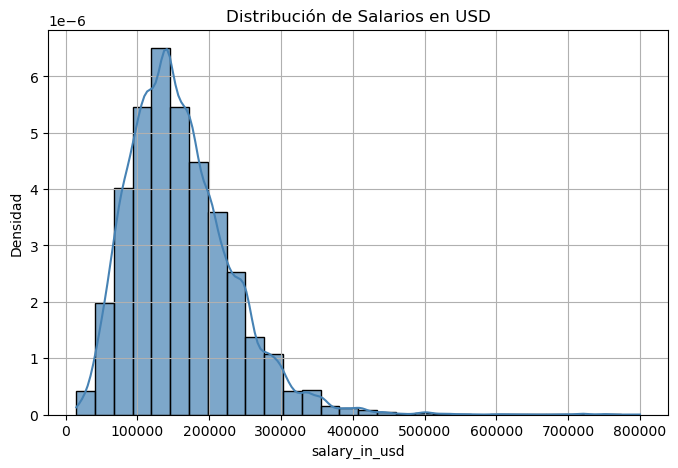

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data['salary_in_usd'], bins=30, kde=True, stat='density', color='steelblue', edgecolor='black', alpha=0.7)
plt.title(f'Distribución de Salarios en USD')
plt.xlabel('salary_in_usd')
plt.ylabel('Densidad')
plt.grid(True)

plt.show()

In [16]:
data_exc_salary = data.loc[:, ~data.columns.isin(['salary', 'salary_in_usd'])]

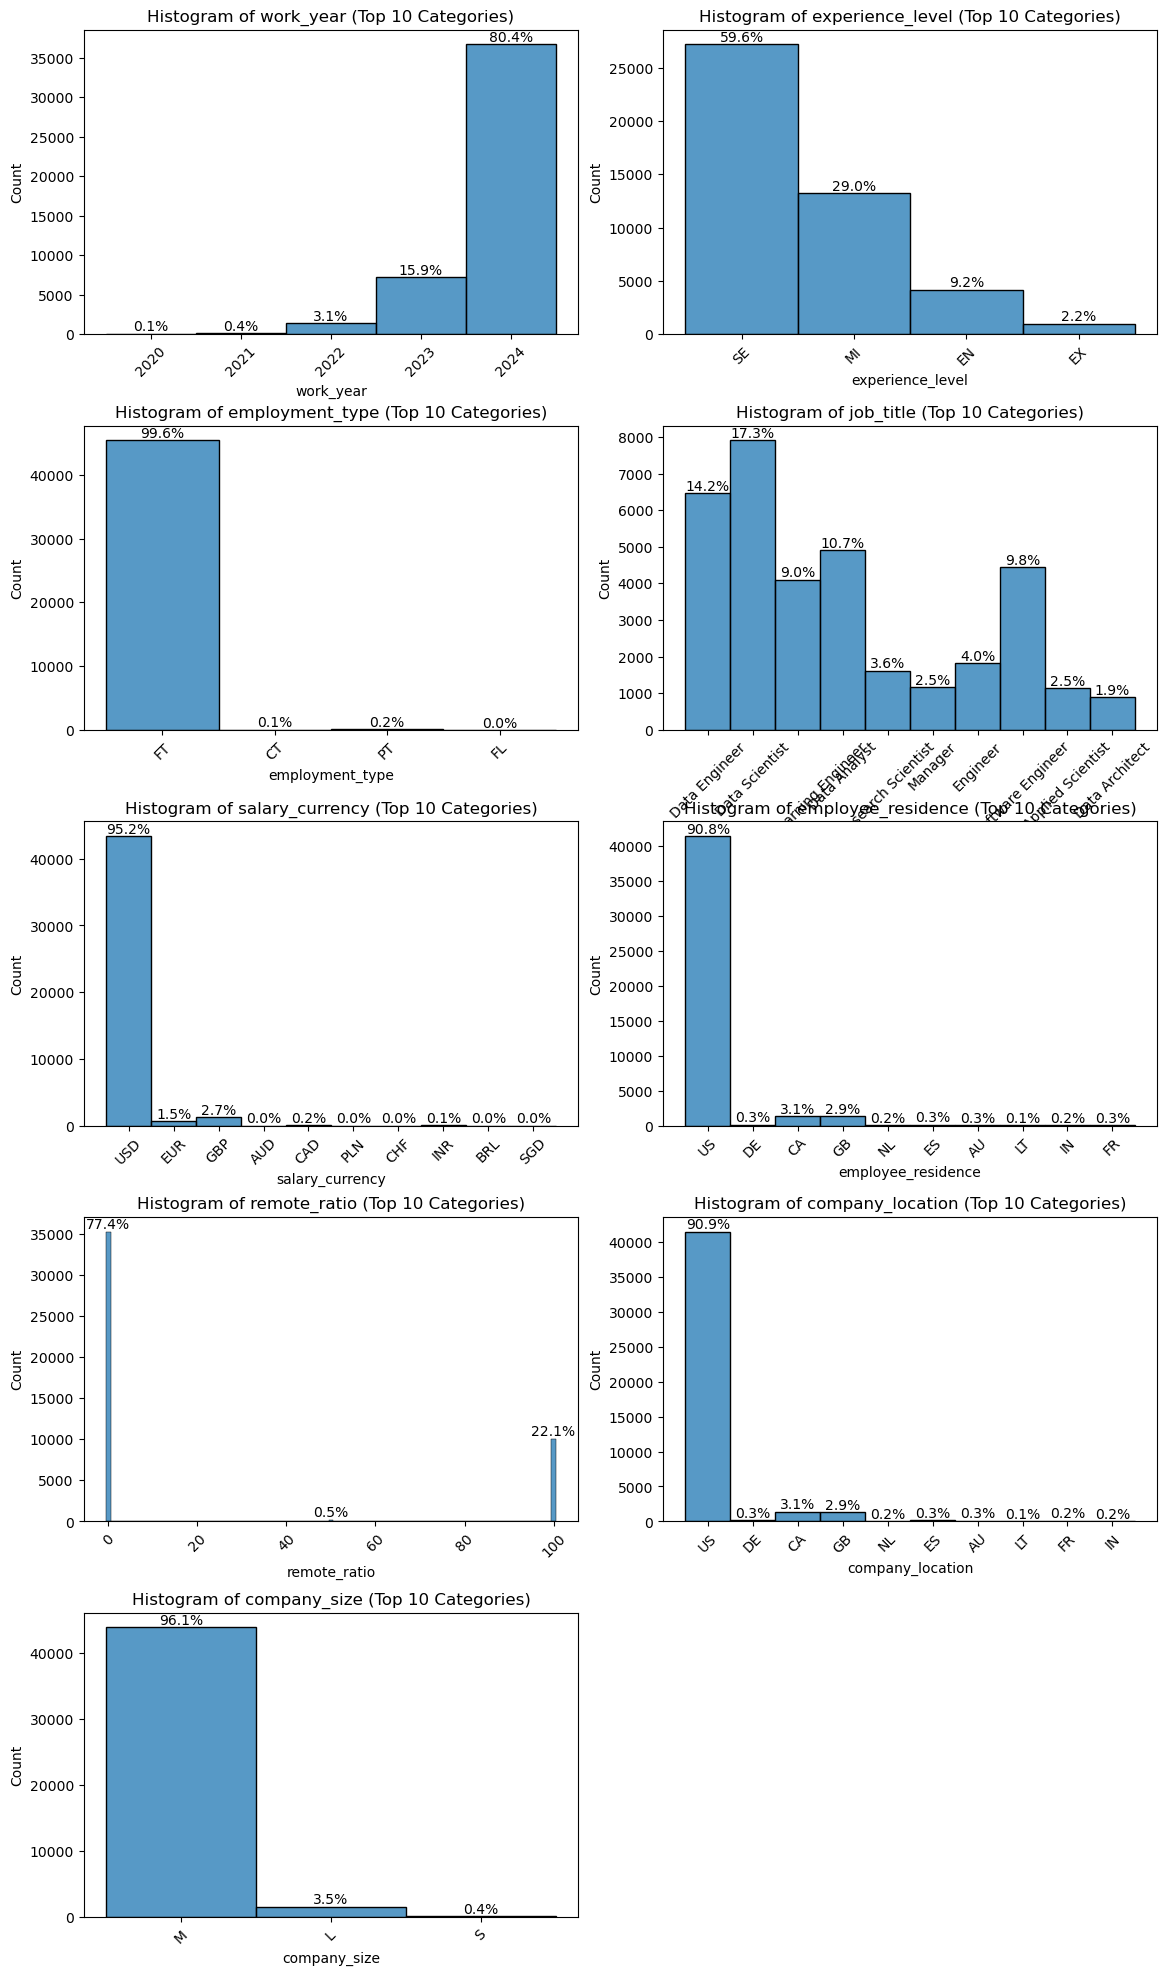

In [17]:
plot_top10(data_exc_salary)

In [18]:
top_10_jobs = data['job_title'].value_counts().head(10)
top_10_jobs

job_title
Data Scientist               7915
Data Engineer                6466
Data Analyst                 4900
Software Engineer            4450
Machine Learning Engineer    4102
Engineer                     1831
Research Scientist           1621
Manager                      1161
Applied Scientist            1140
Data Architect                886
Name: count, dtype: int64

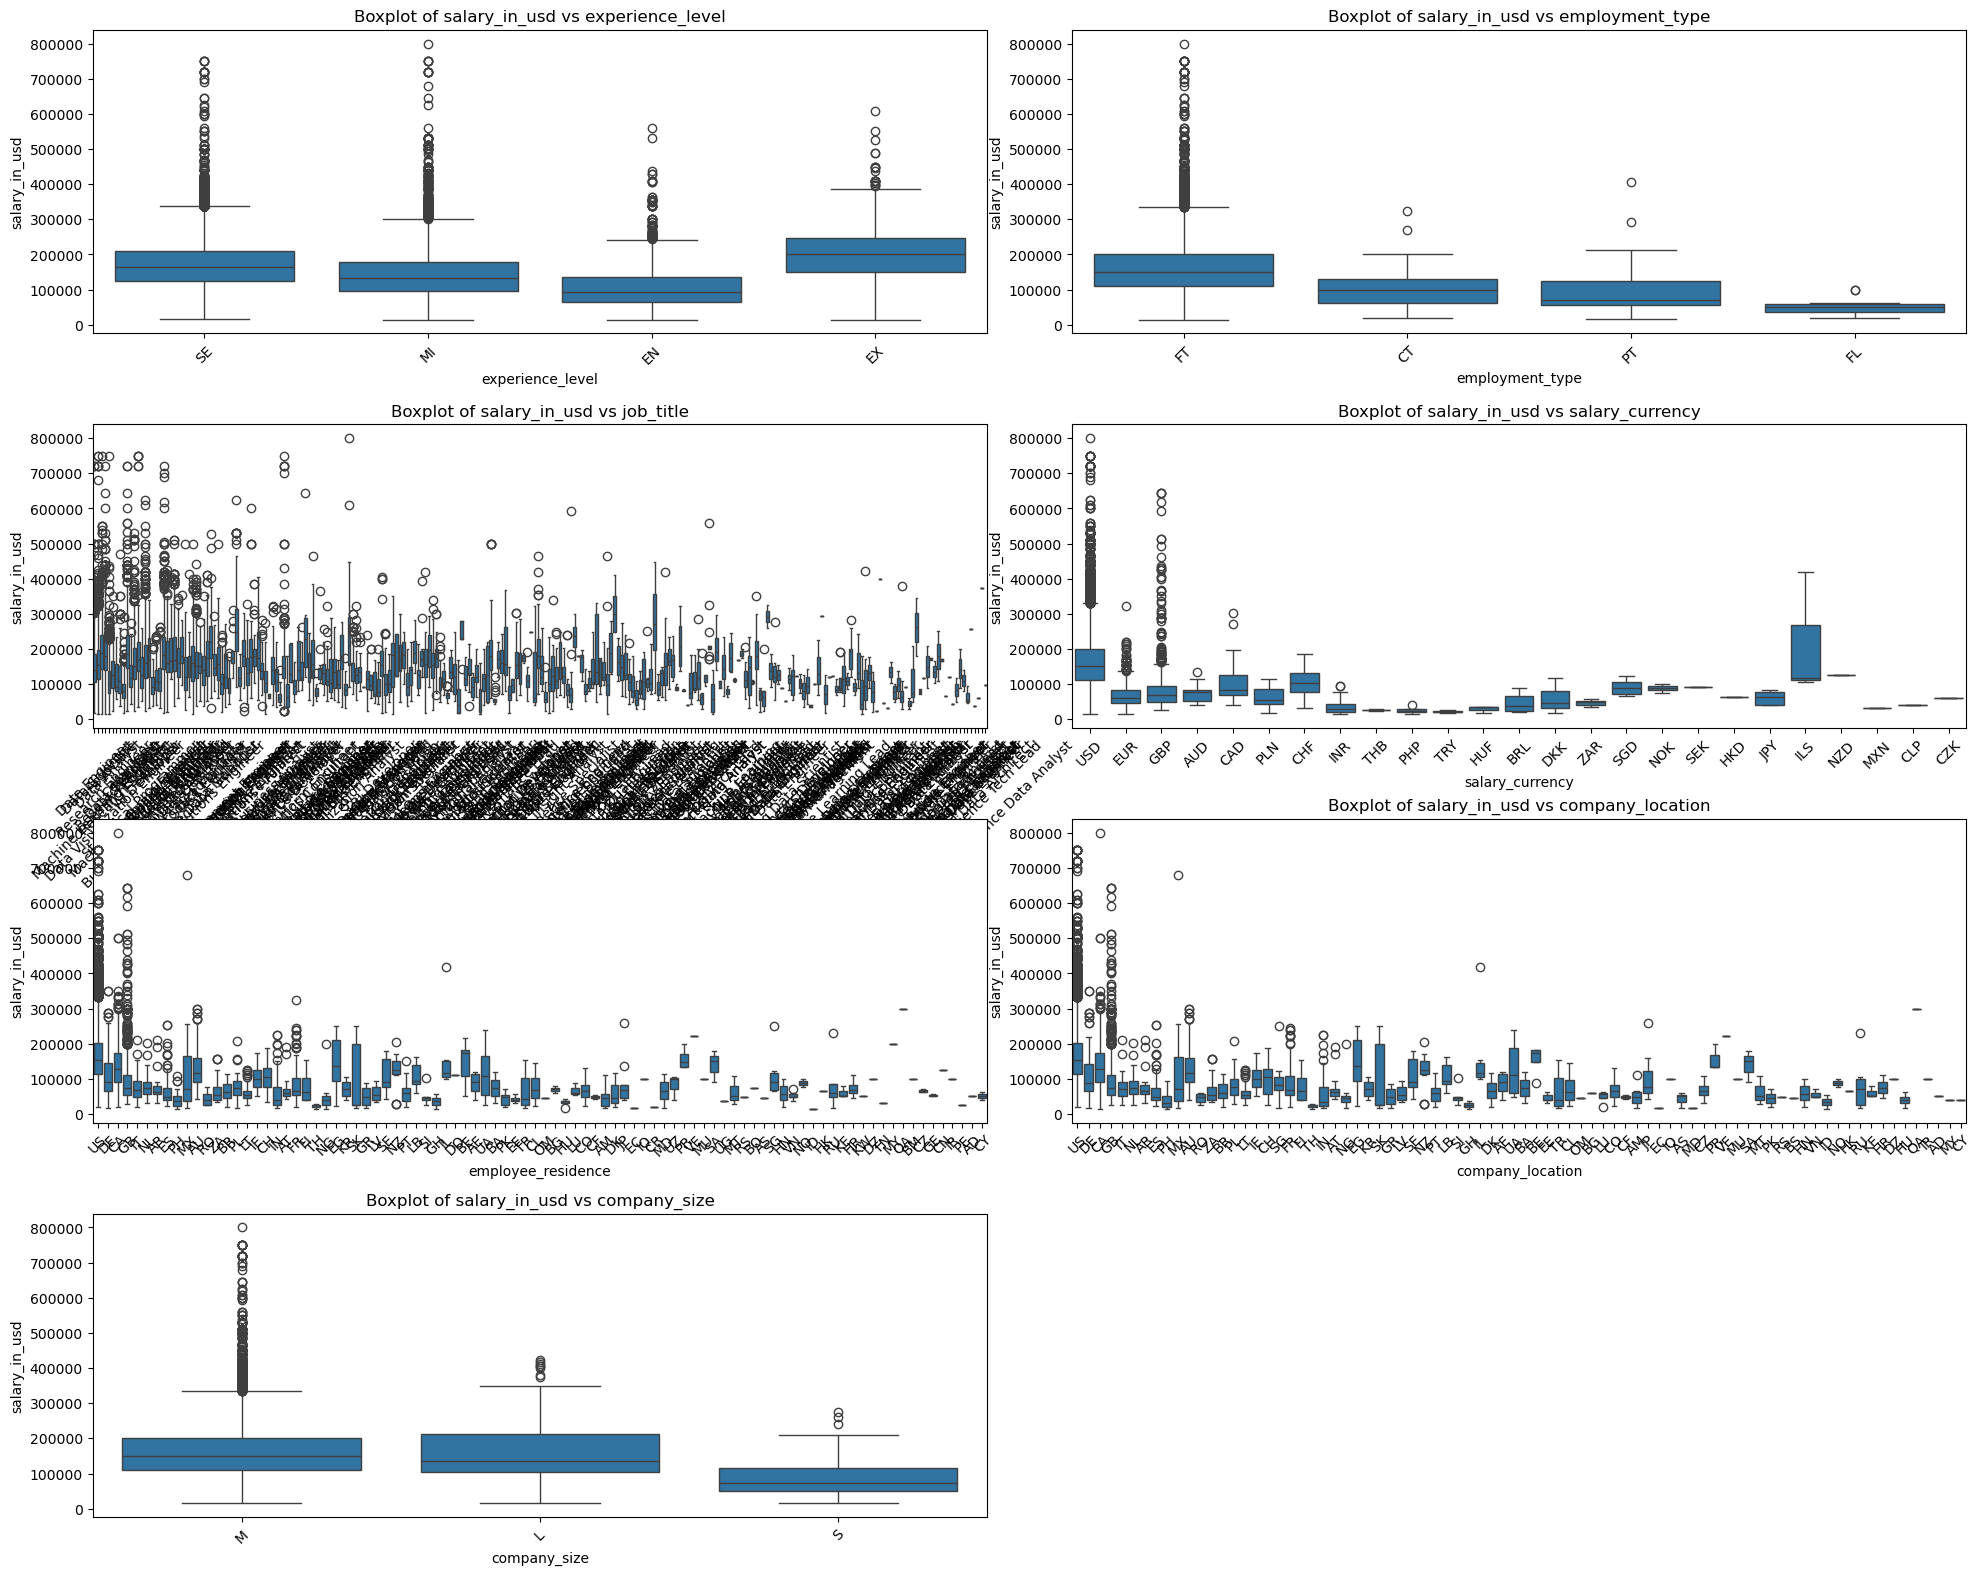

In [19]:
plot_boxplots_vscat(data,"salary_in_usd")

In [20]:
dropdown_features(data)

Dropdown(description='Variable:', options=('work_year', 'experience_level', 'employment_type', 'job_title', 's…

In [21]:
plot_hist(selection)

NameError: name 'selection' is not defined

#### 3. Limpieza y Preparación de los Datos

In [407]:
# 1. Eliminación duplicados
data = data.drop_duplicates()
data.shape

(23170, 11)

In [408]:
# 2. Filtrar año 2024
data = data.loc[data["work_year"] == 2024]
data.shape

(17879, 11)

In [409]:
# 3. descartar columnas innecesarias
columns_to_drop = ['work_year', 'salary', 'salary_currency']
data = data.drop(columns=columns_to_drop)
data.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
29733,MI,FT,Data Scientist,111740,US,0,US,M
23692,SE,FT,Data Scientist,115000,US,100,US,M
39047,SE,FT,Machine Learning Engineer,112000,US,0,US,M


In [410]:
#!pip install -q pycountry-convert

In [411]:
# 4. Agrupar company_location y employee_residency
import pycountry_convert as pc
def get_continent(col):
    try:
        if len(col) == 2:
            country_code = col
        else:
            country_code = pc.country_name_to_country_alpha2(col.strip('\'"'))
        continent_name = pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(country_code))
        return continent_name
    except:
        return None
data['company_location']=data['company_location'].apply(lambda x: get_continent(x))
data['employee_residence']=data['employee_residence'].apply(lambda x: get_continent(x))

In [412]:
data['company_country'] = data['company_location']
data['employee_country'] = data['employee_residence']
data.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_country,employee_country
29733,MI,FT,Data Scientist,111740,US,0,US,M,US,US
23692,SE,FT,Data Scientist,115000,US,100,US,M,US,US
39047,SE,FT,Machine Learning Engineer,112000,US,0,US,M,US,US


In [47]:
# 5. Agrupar company_location y employee_residency
import pycountry_convert as pc
def get_continent(col):
    try:
        if len(col) == 2:
            country_code = col
        else:
            country_code = pc.country_name_to_country_alpha2(col.strip('\'"'))
        continent_name = pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(country_code))
        return continent_name
    except:
        return None
data['company_location']=data['company_location'].apply(lambda x: get_continent(x))
data['employee_residence']=data['employee_residence'].apply(lambda x: get_continent(x))

In [48]:
data.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_country,employee_country
29733,MI,FT,Data Scientist,111740,North America,0,North America,M,US,US
23692,SE,FT,Data Scientist,115000,North America,100,North America,M,US,US
39047,SE,FT,Machine Learning Engineer,112000,North America,0,North America,M,US,US


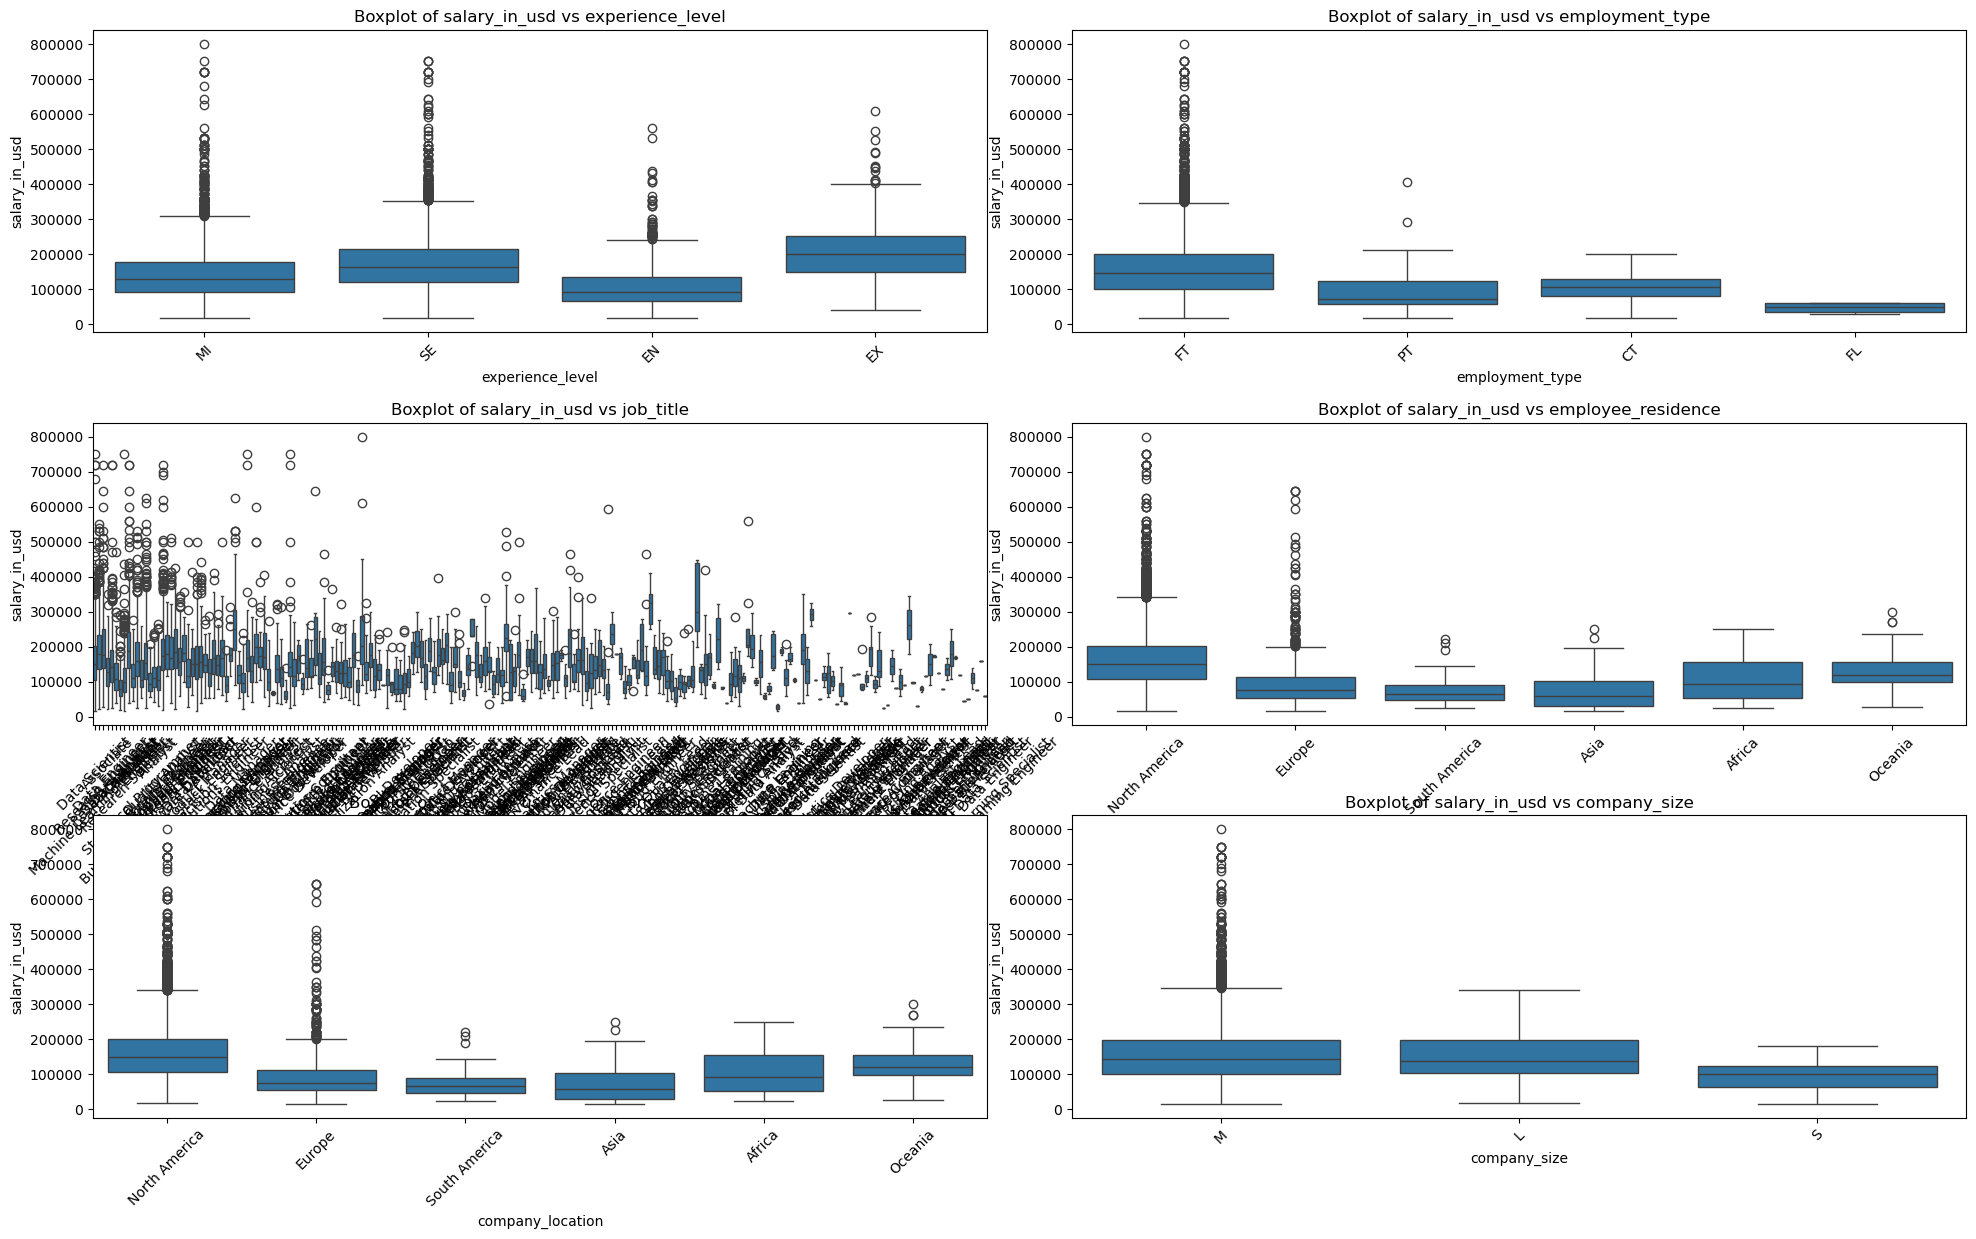

In [413]:
plot_boxplots_vscat(data,"salary_in_usd")

In [414]:
data.shape

(17879, 10)

In [415]:
# Cross-tabulation between company_location and employee_residence
location_comparison = pd.crosstab(data['company_location'], data['employee_residence'])
location_comparison

employee_residence,Africa,Asia,Europe,North America,Oceania,South America
company_location,,,,,,
Africa,47,0,0,1,0,0
Asia,0,90,0,0,0,0
Europe,0,0,1070,1,0,0
North America,0,1,0,16513,0,0
Oceania,0,0,0,0,107,0
South America,0,0,0,0,0,49


In [416]:
# 5. filtrar los datos para 10 posiciones mas populares
top_10_titles = data['job_title'].value_counts().nlargest(10).index
data_top10 = data[data['job_title'].isin(top_10_titles)]
data_top10 = data_top10.drop(['company_country', 'employee_country'], axis = 1)
print('data_top10 shape: ',data_top10.shape)
data_top10_country = data[data['job_title'].isin(top_10_titles)]
print('Forma data_top10 incluyendo nombre pais residencia y compañia: ', data_top10_country.shape)

(11409, 8)

In [417]:
data_top10.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
29733,MI,FT,Data Scientist,111740,North America,0,North America,M
23692,SE,FT,Data Scientist,115000,North America,100,North America,M
39047,SE,FT,Machine Learning Engineer,112000,North America,0,North America,M


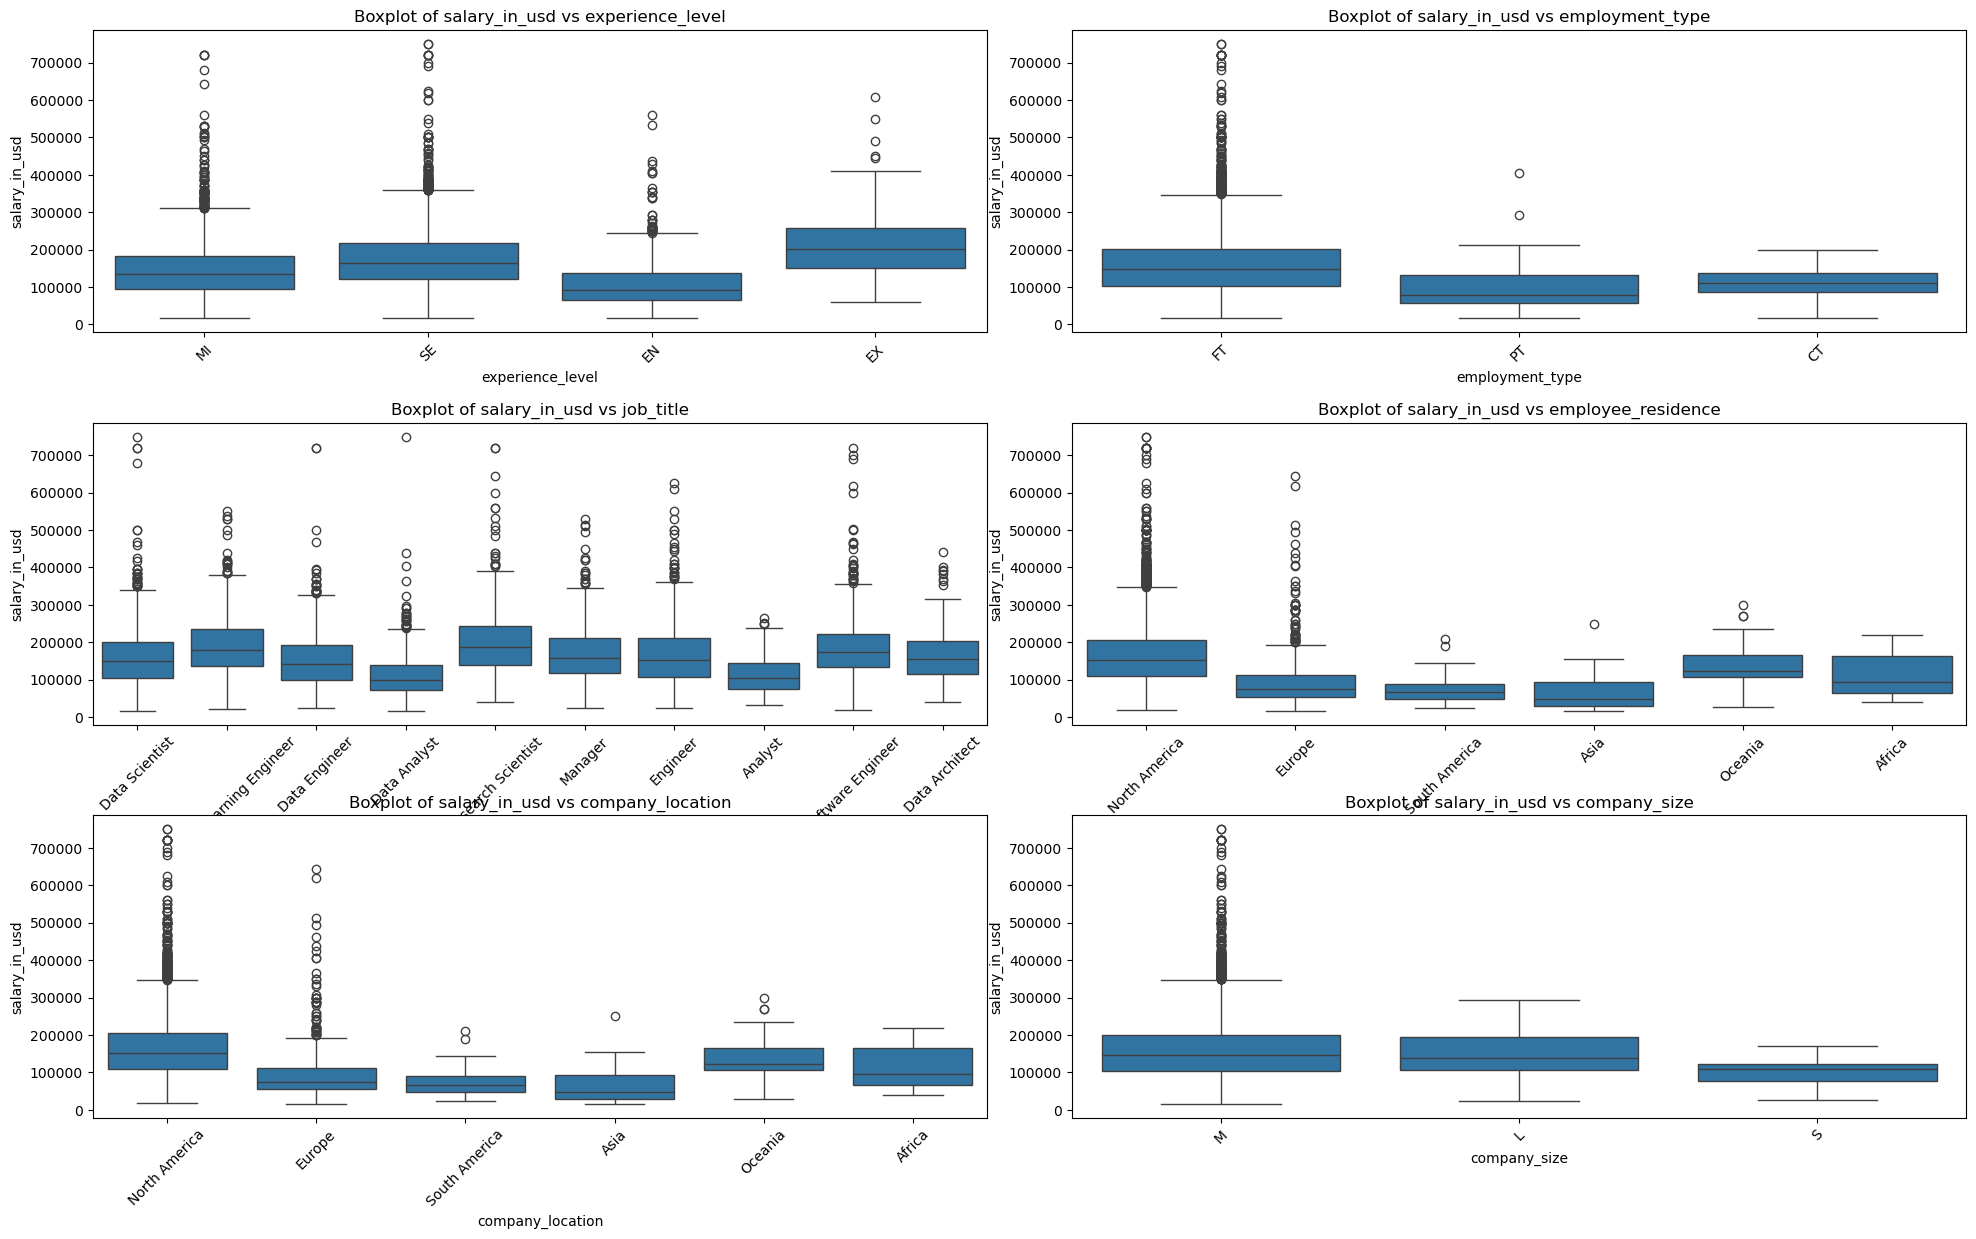

In [418]:
plot_boxplots_vscat(data_top10,"salary_in_usd")

In [419]:
different_locations = data_top10[data_top10['company_location'] != data_top10['employee_residence']]
print(f"Número de ubicaciones diferentes: {len(different_locations)}")

Número de ubicaciones diferentes: 1


In [420]:
location_comparison_top10 = pd.crosstab(data_top10['company_location'], data_top10['employee_residence'])
location_comparison_top10

employee_residence,Africa,Asia,Europe,North America,Oceania,South America
company_location,,,,,,
Africa,31,0,0,0,0,0
Asia,0,55,0,0,0,0
Europe,0,0,711,1,0,0
North America,0,0,0,10500,0,0
Oceania,0,0,0,0,73,0
South America,0,0,0,0,0,38


In [421]:
# Tratamiento de valores anómalos
def remove_outliers(df, column_name, threshold=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df


In [422]:
data_top10 = remove_outliers(data_top10, 'salary_in_usd')
print('data_top10 sin outliers shape: ', data_top10.shape)
data_top10_country = remove_outliers(data_top10_country, 'salary_in_usd')
print('Forma data_top10 incluyendo nombre pais residencia y compañia: ', data_top10_country.shape)

(11193, 8)

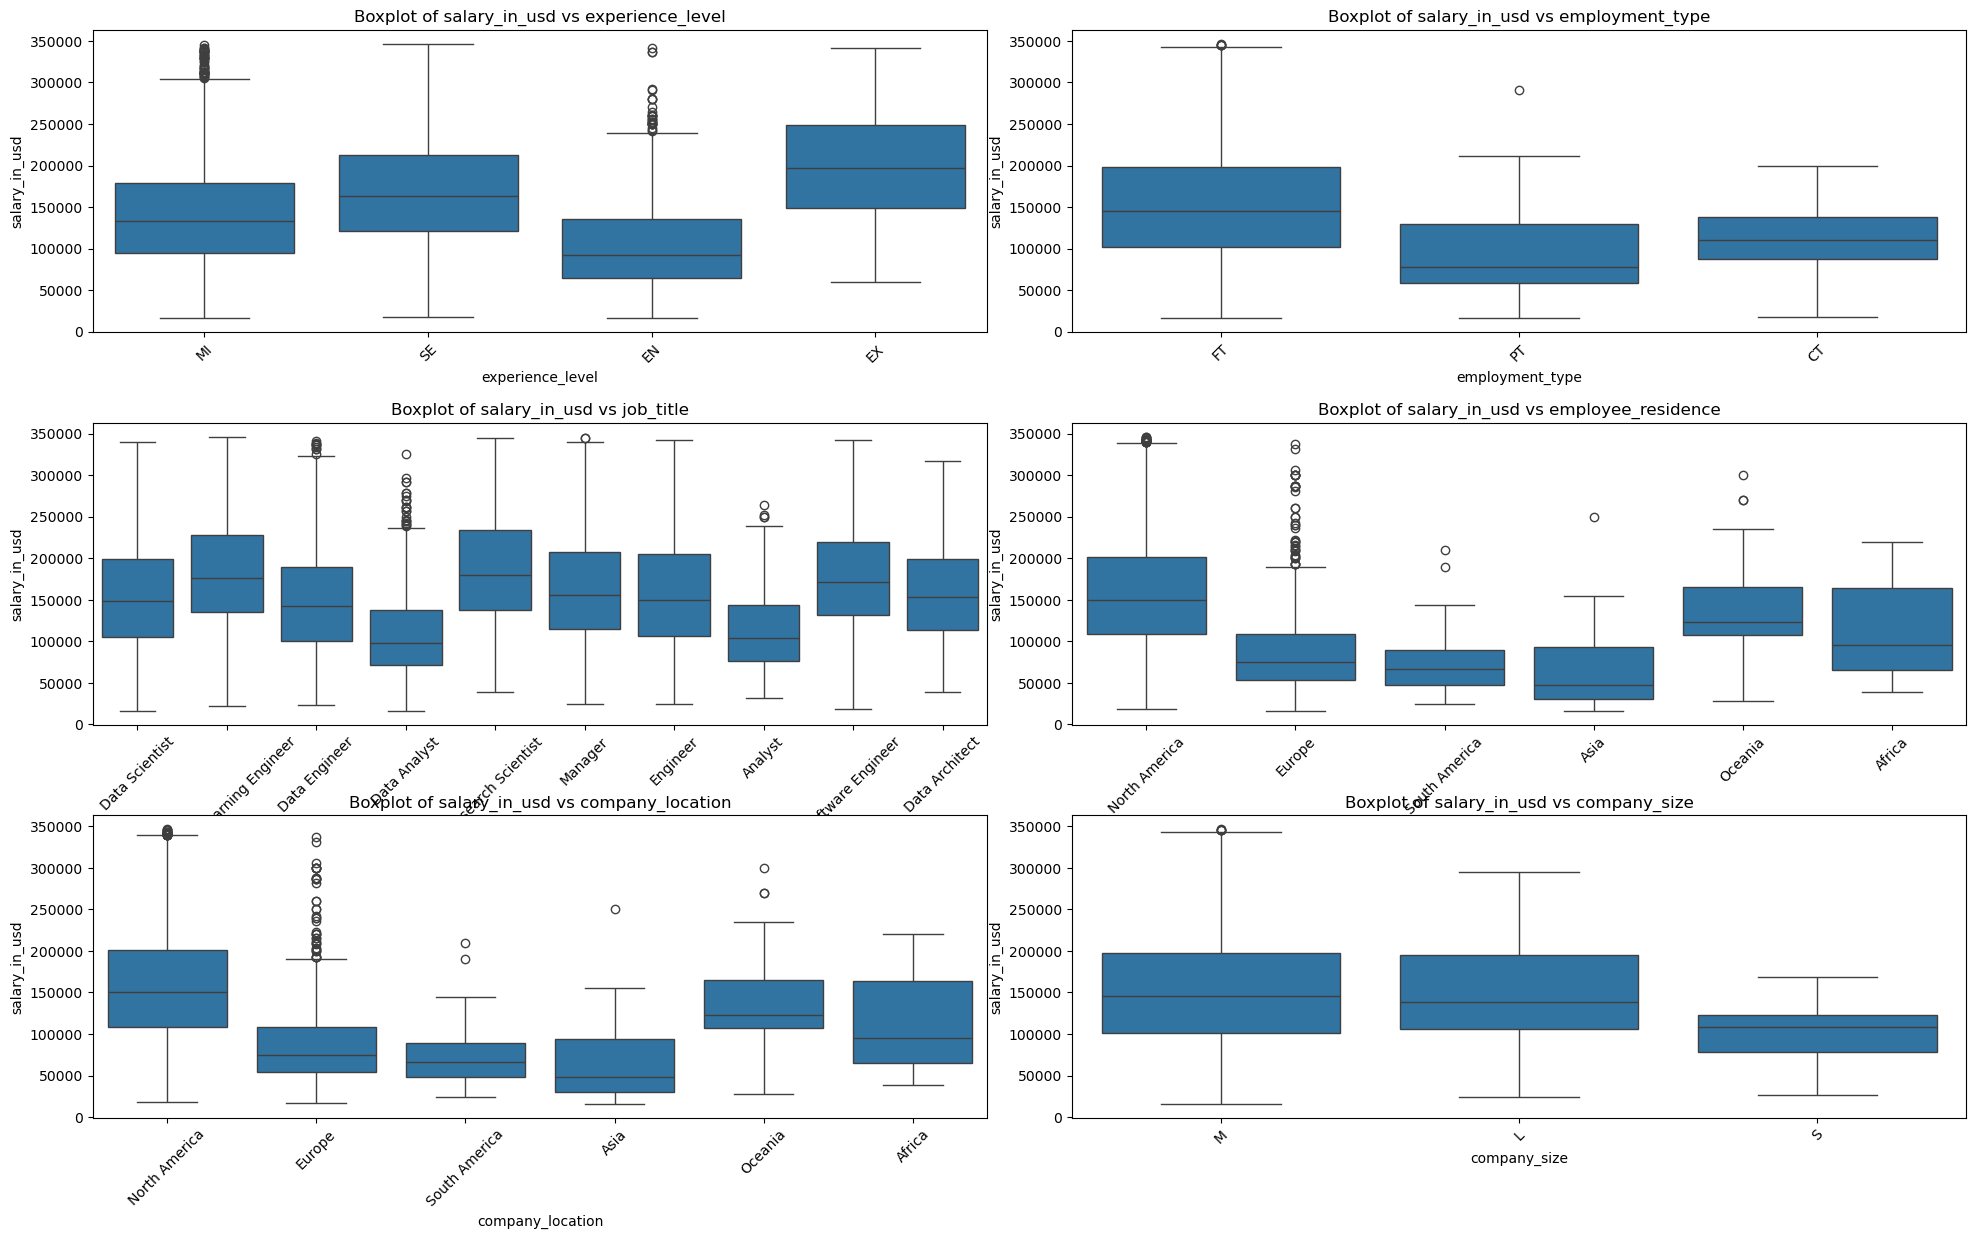

In [423]:
plot_boxplots_vscat(data_top10,"salary_in_usd")

In [62]:
# Saving to CSV
# data_top10.to_csv('data_top10.csv', index=False)
# data_top10_country.to_csv('Data/data_top10_country.csv', index=False)

#### 4. Exploración Adicional de los Datos

In [424]:
# dividiendo salary_in_usd en deciles
data['sal_deciles'] = pd.qcut(data['salary_in_usd'], q=10, labels=range(1, 11))

In [425]:
sal10 =  data.loc[(data["sal_deciles"] == 1)]
sal10 =  data.loc[(data["sal_deciles"] == 1)]
len(sal10)


1791

In [426]:
sal_750K = data.loc[(data["salary_in_usd"] >= 700000)]
sal_750K

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_country,employee_country,sal_deciles
35170,SE,FT,Research Scientist,720000,North America,0,North America,M,United States,United States,10
29395,MI,FT,Software Engineer,720000,North America,100,North America,M,United States,United States,10
41760,MI,FT,Machine Learning Scientist,750000,North America,0,North America,M,United States,United States,10
39281,MI,FT,Machine Learning Scientist,720000,North America,0,North America,M,United States,United States,10
41448,SE,FT,Data Scientist,720000,North America,0,North America,M,United States,United States,10
39942,MI,FT,AI Architect,800000,North America,100,North America,M,Canada,Canada,10
41584,SE,FT,Analytics Engineer,750000,North America,0,North America,M,United States,United States,10
39440,SE,FT,Data Scientist,720000,North America,100,North America,M,United States,United States,10
37531,SE,FT,Analytics Engineer,720000,North America,0,North America,M,United States,United States,10
32167,MI,FT,Research Engineer,720000,North America,0,North America,M,United States,United States,10


In [427]:
sal_25K = data.loc[(data["salary_in_usd"] <= 25000)]
sal_25K

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_country,employee_country,sal_deciles
6264,SE,FT,Data Analyst,25000,North America,100,North America,M,United States,United States,1
40298,SE,FT,BI Developer,21600,Asia,0,Asia,M,Philippines,Philippines,1
39417,SE,FT,Data Quality Engineer,25000,North America,0,North America,M,United States,United States,1
7657,EN,FT,Data Analyst,21600,Asia,100,Asia,M,Philippines,Philippines,1
32409,MI,FT,Data Engineer,25000,North America,100,North America,M,United States,United States,1
42509,EN,FT,Data Analyst,23333,Europe,0,Europe,M,Spain,Spain,1
6317,EN,FT,Data Analyst,23888,Europe,50,Europe,L,Greece,Greece,1
16850,EN,CT,Software Engineer,18000,North America,100,North America,M,Mexico,Mexico,1
25641,MI,FT,Data Analyst,16000,Asia,100,Asia,M,Philippines,Philippines,1
7719,MI,FT,Engineer,24820,Asia,100,Asia,M,Philippines,Philippines,1


In [428]:
def tablas_contingencia(dataframe, decile_column):
    tablas_contingencia = {}
    for column in dataframe.columns:
        if column != decile_column and dataframe[column].dtype == 'object':
            # Create a contingency table using pd.crosstab()
            tabla = pd.crosstab(dataframe[column], dataframe[decile_column])
            # Store the table in the dictionary with the column name as the key
            tablas_contingencia[column] = tabla
    return tablas_contingencia

In [429]:
tablas_contingencia = tablas_contingencia(data, 'sal_deciles')

In [430]:
#pip install wordcloud

In [431]:
# Análisis job_title
from wordcloud import WordCloud
def create_wordcloud(dataframe, column):
    text = ' '.join(dataframe[column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()

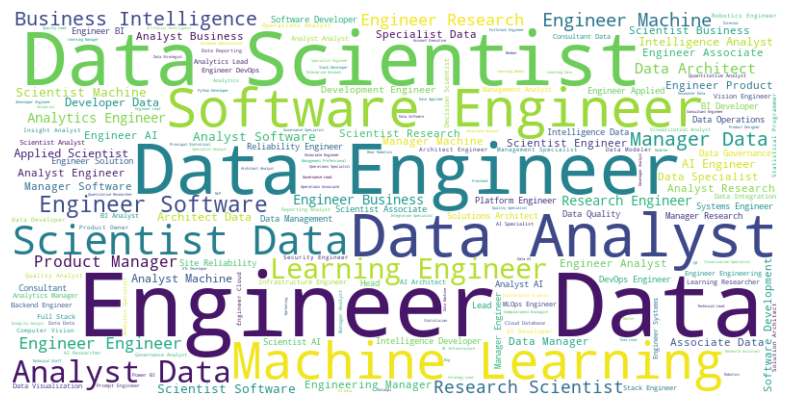

In [432]:
# word cloud 'job_title'
create_wordcloud(data, 'job_title')

In [433]:

# Tabla Contigencia job_title vs. salary_deciles
cont_job_title = tablas_contingencia['job_title']
cont_job_title.to_csv('cont_job_title.csv', index=True)
cont_job_title

sal_deciles,1,2,3,4,5,6,7,8,9,10
job_title,,,,,,,,,,
AI Architect,0,1,3,1,7,5,6,4,5,20
AI Data Scientist,1,0,0,0,0,0,0,0,0,0
AI Developer,2,2,3,3,4,2,3,2,5,5
AI Engineer,15,22,24,25,22,22,26,32,23,26
AI Engineering Manager,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Statistical Programmer,4,4,4,2,1,1,3,0,2,1
Statistician,2,1,2,0,1,2,1,0,1,0
Systems Engineer,3,6,13,14,13,11,17,14,12,9
